In [15]:
from mvlearn.embed.mvmds import MVMDS
from mvlearn.cluster import MultiviewKMeans, MultiviewSpectralClustering
from mvlearn.datasets.gaussian_mixture import GaussianMixture
from mvlearn.plotting.plot import crossviews_plot

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

from graspy.plot import pairplot

In [87]:
## Make Latents
n = 200
mu = [[0,1], [0,-1]]
sigma = np.array([np.eye(2), np.eye(2)])
pi = [0.5,0.5]
GM_train = GaussianMixture(mu,sigma,n,class_probs=pi)

## Test
GM_test = GaussianMixture(mu,sigma,n,class_probs=pi)

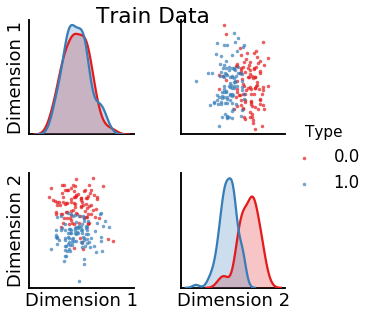

In [88]:
pairplot(GM_train.latent, GM_train.y, title='Train Data')

In [89]:
## Make 2 views
n_noise = 2
transform = 'sin'


GM_train.sample_views(transform=transform, n_noise=n_noise)
GM_test.sample_views(transform=transform, n_noise=n_noise)

Xs_train = GM_train.get_Xy()[0]
y_train = GM_train.y
Xs_test = GM_test.get_Xy()[0]
y_test = GM_test.y

In [70]:
# MVMDS reduction
mvmds = MVMDS(n_components=4)
Xs_hat = mvmds.fit_transform(Xs_train)

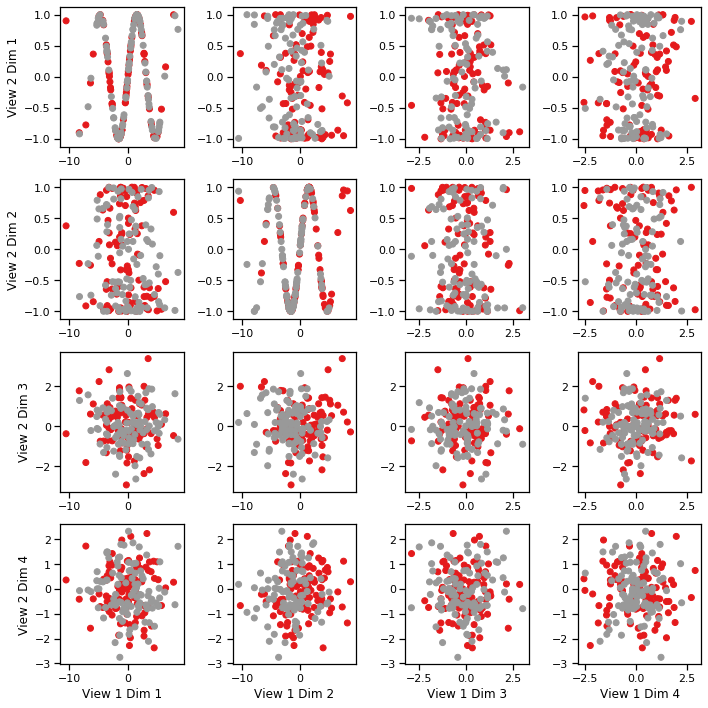

In [84]:
crossviews_plot(Xs_train, y_train, cmap='Set1')

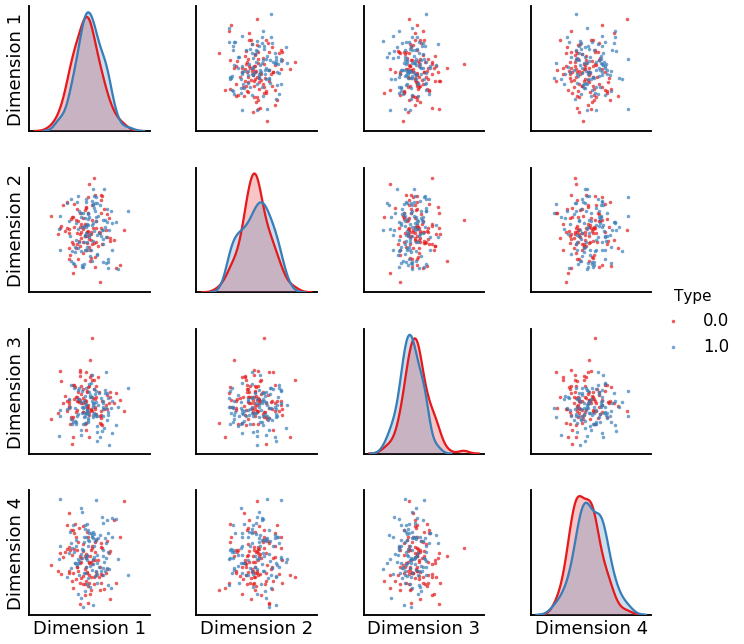

In [72]:
pairplot(Xs_hat, y_train)

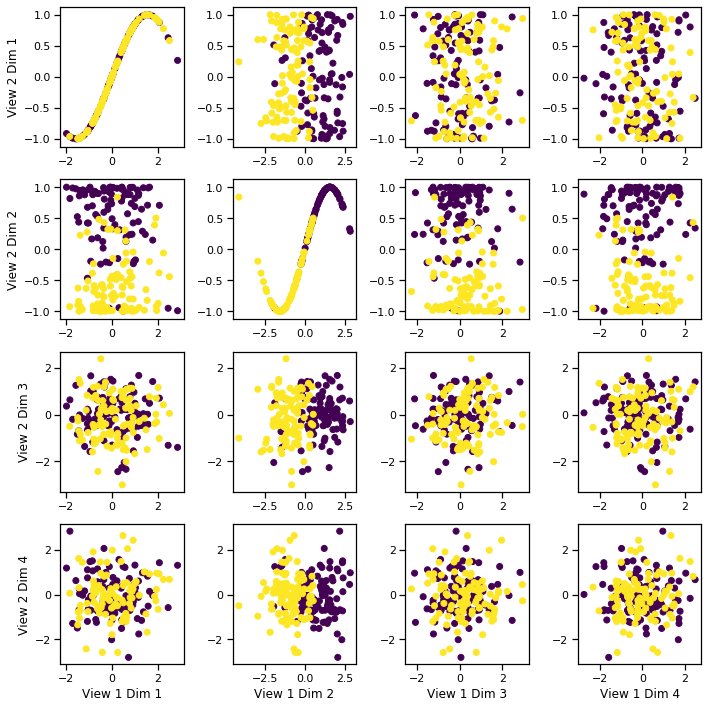

In [91]:
crossviews_plot(Xs_train, y_train)

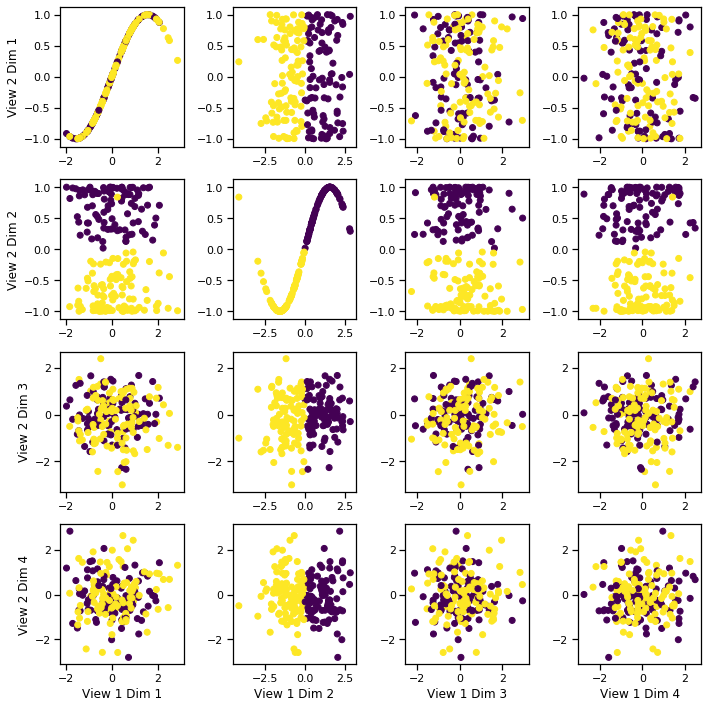

In [96]:
crossviews_plot(Xs_train, y_train_hat)

In [92]:
# Use the MultiviewKMeans instance to cluster the data
m_kmeans = MultiviewKMeans(n_clusters=2)
y_train_hat = m_kmeans.fit_predict(Xs_train)

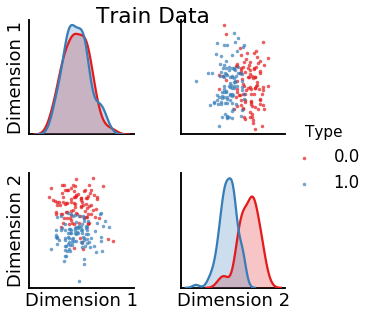

In [93]:
pairplot(GM_train.latent, GM_train.y, title='Train Data')

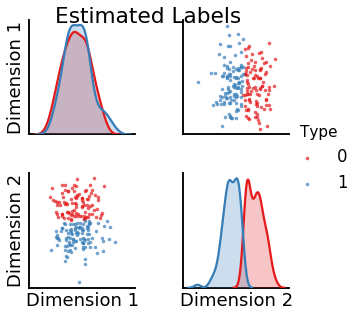

In [94]:
pairplot(GM_train.latent, y_train_hat, title='Estimated Labels')

## Custom Mock data

In [123]:
latentL = np.random.normal(-1,2,50)
latentR = np.random.normal(1,2,50)
latent = np.hstack((latentL, latentR))
yLatent = [0]*50 + [1]*50

idx_shift = [list()
indep1L = np.random.normal(-1,2,50)
indep1R = np.random.normal(1,2,50)
indep1 = np.hstack((indep1L, indep1R))

indep2L = np.random.normal(-1,2,50)
indep2R = np.random.normal(1,2,50)
indep2 = np.hstack((indep2L, indep2R))

yIndep = np.asarray([0]*50 + [1]*50)

noise1 = np.random.normal(0,1,100)
noise2 = np.random.normal(0,1,100)

X1 = np.vstack((latent, indep1, noise1)).T
X2 = np.vstack((latent, indep2, noise2)).T

Xs = [X1, X2]

In [124]:
U,S,V = np.linalg.svd(X1, full_matrices=False)

In [119]:
# MVMDS reduction
mvmds = MVMDS(n_components=3)
Xs_hat = mvmds.fit_transform(Xs)

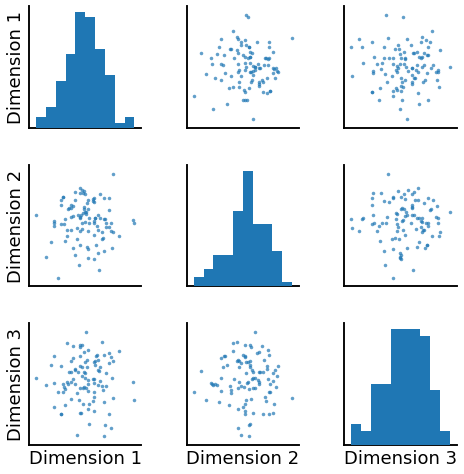

In [120]:
pairplot(Xs_hat)